# Boston Venues & Housing Price Analysis

## Introduction

#### Boston is one of the biggest and the 21st most populous city in the US. The city is also placed among the top 30 most economically powerful cities in the world. Consider all these factors, Boston always attracts real estate investor’s attention when it comes down to real estate investment. However, Boston consists of several neighborhoods, and each neighborhood has its own characteristic. Therefore, it’s important to analyze the relationship between the neighborhood’s venue data and its housing price, and see what’s the most common venues in high housing price neighborhood.

## Data Description

#### The Data I am going to use in this project are listed as below:1.	The list of the neighborhood in Boston from Wikipedia 2.	Foursquare API to get the most common venues of given Neighborhood in Boston3.	The average housing price of each neighborhood from redfin. Since it is hard to find the aggregated data online, I manually record the data from the redfin website and put them into a CSV file.

In [120]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium # map rendering library
from bs4 import BeautifulSoup
import requests
import re
from matplotlib import pyplot as plt
import seaborn as sns
import folium
import geocoder
print('Libraries imported.')

Libraries imported.


In [2]:
source = requests.get('https://en.wikipedia.org/wiki/Neighborhoods_in_Boston').text
soup = BeautifulSoup(source, 'lxml')

In [3]:
body = soup.find('ul')
tags = body('li')
ls = list()
for tag in tags:
    tag = str(tag)
    tag = tag.split('title=\"')[1].split('>')[1].split('<')[0]
    ls.append(tag)
ls = [''.join(x) for x in ls]
del ls[8]
print(ls)
print('Total number of Neighborhood in Boston is:', len(ls))

['Allston', 'Back Bay', 'Bay Village', 'Beacon Hill', 'Brighton', 'Charlestown', 'Chinatown', 'Dorchester', 'East Boston', 'Fenway Kenmore', 'Hyde Park', 'Jamaica Plain', 'Mattapan', 'Mission Hill', 'North End', 'Roslindale', 'Roxbury', 'South Boston', 'South End', 'West End', 'West Roxbury']
Total number of Neighborhood in Boston is: 21


In [4]:
city = list()
a = 0
while a<21:
    a = a+1
    city.append('Boston')

In [5]:
price = pd.read_csv('/Users/KissMyAss/Desktop/PYTHON/boston_housing_price.csv')
price = price.dropna()
price.head()

,Neighborhood,Housing Price per Sq.Ft
0,Allston,950.0
1,Back Bay,1100.0
2,Bay Village,1130.0
3,Beacon Hill,1120.0
4,Brighton,552.0


In [6]:
df = {'City': city,
     'Neighborhood': ls,}
df = pd.DataFrame(df)
df['Latitude'] = ''
df['Longitude'] = ''
df.head(5)

,City,Neighborhood,Latitude,Longitude
0,Boston,Allston,,
1,Boston,Back Bay,,
2,Boston,Bay Village,,
3,Boston,Beacon Hill,,
4,Boston,Brighton,,


In [7]:
Neigh = df['Neighborhood'].tolist()
a = -1
for N in Neigh:
    a = a+1
    address = N+',MA'
    geolocator = Nominatim(user_agent="Boston_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    df['Latitude'][a] = latitude
    df['Longitude'][a] = longitude

In [8]:
address = 'Boston, MA'

geolocator = Nominatim(user_agent="Boston_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Boston are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Boston are 42.3602534, -71.0582912.


In [100]:
# create map of New York using latitude and longitude values
map_Boston = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Boston)  
map_Boston

In [11]:
CLIENT_ID = 'UHBOQPN2GXJD3NPADPBONSJ2PT4L5JEQHHIYDLWEMXFNRT3J' # your Foursquare ID
CLIENT_SECRET = 'T1HOJRMIS2YKVPYA2YRIEI0HLTZWDBYDOUUJTUDRZCKADJCN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UHBOQPN2GXJD3NPADPBONSJ2PT4L5JEQHHIYDLWEMXFNRT3J
CLIENT_SECRET:T1HOJRMIS2YKVPYA2YRIEI0HLTZWDBYDOUUJTUDRZCKADJCN


In [286]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Allston are 42.3554344, -71.1321271.


In [287]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
#-->

#<!--
radius = 500 # define radius
#-->

#<!--
#\\ # create URL
url = 'https://api.foursquare.com/v2/venues/explore?https://www.bostonmagazine.com/top-places-to-live-2018-single-family-homes/&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?https://www.bostonmagazine.com/top-places-to-live-2018-single-family-homes/&client_id=UHBOQPN2GXJD3NPADPBONSJ2PT4L5JEQHHIYDLWEMXFNRT3J&client_secret=T1HOJRMIS2YKVPYA2YRIEI0HLTZWDBYDOUUJTUDRZCKADJCN&v=20180605&ll=42.3554344,-71.1321271&radius=500&limit=100'

In [288]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eb710bdedbcad001b15a766'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Allston',
  'headerFullLocation': 'Allston, Boston',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 77,
  'suggestedBounds': {'ne': {'lat': 42.3599344045, 'lng': -71.12604898570221},
   'sw': {'lat': 42.3509343955, 'lng': -71.1382052142978}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '530647fd498e4ac184afea7c',
       'name': "Lulu's Allston",
       'location': {'address': '421 Cambridge St',
        'lat': 42.35506753787248,
        'lng': -71.1341073754865,
        'labeledLatLngs': [{'label': 'display',
 

In [289]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [290]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Lulu's Allston,Comfort Food Restaurant,42.355068,-71.134107
1,Azama Grill,Falafel Restaurant,42.354422,-71.132358
2,Allston Diner,Diner,42.354979,-71.134295
3,Fish Market Sushi Bar,Sushi Restaurant,42.353039,-71.132975
4,Kaju Tofu House,Korean Restaurant,42.354329,-71.132374


In [291]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [292]:
Boston_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )


Allston
Back Bay
Bay Village
Beacon Hill
Brighton
Charlestown
Chinatown
Dorchester
East Boston
Fenway Kenmore
Hyde Park
Jamaica Plain
Mattapan
Mission Hill
North End
Roslindale
Roxbury
South Boston
South End
West End
West Roxbury


In [293]:
print(Boston_venues.shape)
Boston_venues.head()

(844, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allston,42.355434,-71.132127,Lulu's Allston,42.355068,-71.134107,Comfort Food Restaurant
1,Allston,42.355434,-71.132127,Azama Grill,42.354422,-71.132358,Falafel Restaurant
2,Allston,42.355434,-71.132127,Allston Diner,42.354979,-71.134295,Diner
3,Allston,42.355434,-71.132127,Fish Market Sushi Bar,42.353039,-71.132975,Sushi Restaurant
4,Allston,42.355434,-71.132127,Kaju Tofu House,42.354329,-71.132374,Korean Restaurant


In [294]:
Boston_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allston,77,77,77,77,77,77
Back Bay,66,66,66,66,66,66
Bay Village,43,43,43,43,43,43
Beacon Hill,40,40,40,40,40,40
Brighton,44,44,44,44,44,44
Charlestown,35,35,35,35,35,35
Chinatown,100,100,100,100,100,100
Dorchester,12,12,12,12,12,12
East Boston,33,33,33,33,33,33


In [295]:
Boston_onehot = pd.get_dummies(Boston_venues[['Venue Category']], prefix="", prefix_sep="")
Boston_onehot['Neighborhood'] = Boston_venues['Neighborhood'] 
fixed_columns = [Boston_onehot.columns[-1]] + list(Boston_onehot.columns[:-1])
Boston_onehot = Boston_onehot[fixed_columns]

Boston_onehot.head()

,Yoga Studio,ATM,Accessories Store,American Restaurant,Arepa Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach,Belgian Restaurant,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Bus Stop,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Library,Liquor Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Nail Salon,National Park,Neighborhood,New American Restaurant,Nightclub,Noodle House,Opera House,Optical Shop,Other Repair Shop,Outdoor Sculpture,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Record Shop,Rental Car Location,Resort,Restaurant,River,Rock Club,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Ski Chalet,Smoke Shop,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Allston,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Allston,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Allston,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [296]:
Boston_grouped = Boston_onehot.groupby('Neighborhood').mean().reset_index()
Boston_grouped.head()

,Neighborhood,Yoga Studio,ATM,Accessories Store,American Restaurant,Arepa Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach,Belgian Restaurant,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Bus Stop,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Library,Liquor Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Nail Salon,National Park,New American Restaurant,Nightclub,Noodle House,Opera House,Optical Shop,Other Repair Shop,Outdoor Sculpture,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Record Shop,Rental Car Location,Resort,Restaurant,River,Rock Club,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Ski Chalet,Smoke Shop,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Allston,0.000000,0.0,0.0,0.000000,0.0,0.0,0.025974,0.012987,0.012987,0.0,0.0,0.038961,0.000000,0.012987,0.0,0.0,0.0,0.0,0.0,0.000,0.012987,0.000000,0.0,0.000000,0.000,0.0,0.025974,0.000000,0.012987,0.000000,0.000000,0.012987,0.012987,0.0,0.038961,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.012987,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.012987,0.0,0.025974,0.0,0.0,0.012987,0.000000,0.012987,0.0,0.012987,0.012987,0.000000,0.0,0.000,0.0,0.000000,0.025974,0.012987,0.0,0.000000,0.0,0.0,0.012987,0.0,0.00,0.000000,0.000000,0.000000,0.012987,0.012987,0.0,0.012987,0.0,0.000,0.0,0.0,0.012987,0.000000,0.012987,0.000000,0.000000,0.000,0.012987,0.012987,0.0,0.025974,0.012987,0.0,0.000000,0.0,0.000,0.077922,0.000,0.012987,0.000000,0.0,0.012987,0.000000,0.0,0.012987,0.000000,0.025974,0.0,0.000000,0.0,0.0,0.000000,0.0,0.012987,0.0,0.0,0.000000,0.012987,0.0,0.0,0.0,0.000,0.000,0.000000,0.0,0.0,0.000000,0.012987,0.025974,0.000000,0.038961,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.012987,0.0,0.012987,0.012987,0.000000,0.000000,0.012987,0.012987,0.0,0.012987,0.0,0.000000,0.0,0.012987,0.0,0.0,0.0,0.000000,0.0,0.0,0.012987,0.000000,0.000000,0.012987,0.0,0.012987,0.0,0.012987,0.0,0.038961,0.000000,0.0,0.025974,0.000000,0.000,0.000000,0.025974,0.012987,0.0,0.000000
1,B

In [297]:
new_Boston_grouped = pd.merge(Boston_grouped, price, on ='Neighborhood')
new_Boston_grouped.head()

,Neighborhood,Yoga Studio,ATM,Accessories Store,American Restaurant,Arepa Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach,Belgian Restaurant,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Bus Stop,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundry Service,Library,Liquor Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Nail Salon,National Park,New American Restaurant,Nightclub,Noodle House,Opera House,Optical Shop,Other Repair Shop,Outdoor Sculpture,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Record Shop,Rental Car Location,Resort,Restaurant,River,Rock Club,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Ski Chalet,Smoke Shop,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tour Provider,Tourist Information Center,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Housing Price per Sq.Ft
0,Allston,0.000000,0.0,0.0,0.000000,0.0,0.0,0.025974,0.012987,0.012987,0.0,0.0,0.038961,0.000000,0.012987,0.0,0.0,0.0,0.0,0.0,0.000,0.012987,0.000000,0.0,0.000000,0.000,0.0,0.025974,0.000000,0.012987,0.000000,0.000000,0.012987,0.012987,0.0,0.038961,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.012987,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.012987,0.0,0.025974,0.0,0.0,0.012987,0.000000,0.012987,0.0,0.012987,0.012987,0.000000,0.0,0.000,0.0,0.000000,0.025974,0.012987,0.0,0.000000,0.0,0.0,0.012987,0.0,0.00,0.000000,0.000000,0.000000,0.012987,0.012987,0.0,0.012987,0.0,0.000,0.0,0.0,0.012987,0.000000,0.012987,0.000000,0.000000,0.000,0.012987,0.012987,0.0,0.025974,0.012987,0.0,0.000000,0.0,0.000,0.077922,0.000,0.012987,0.000000,0.0,0.012987,0.000000,0.0,0.012987,0.000000,0.025974,0.0,0.000000,0.0,0.0,0.000000,0.0,0.012987,0.0,0.0,0.000000,0.012987,0.0,0.0,0.0,0.000,0.000,0.000000,0.0,0.0,0.000000,0.012987,0.025974,0.000000,0.038961,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.012987,0.0,0.012987,0.012987,0.000000,0.000000,0.012987,0.012987,0.0,0.012987,0.0,0.000000,0.0,0.012987,0.0,0.0,0.0,0.000000,0.0,0.0,0.012987,0.000000,0.000000,0.012987,0.0,0.012987,0.0,0.012987,0.0,0.038961,0.000000,0.0,0.025974,0.000000,0.000,0.000000,0.025974,0

In [298]:
from sklearn.preprocessing import StandardScaler
X = new_Boston_grouped.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.47239606, -0.2236068 , -0.30051093, ..., -0.29923129,
        -0.43750709,  0.75689835],
       [ 0.15401495, -0.2236068 , -0.30051093, ..., -0.29923129,
        -0.43750709,  1.26580546],
       [-0.47239606, -0.2236068 , -0.30051093, ..., -0.29923129,
         1.53869359,  1.36758688],
       ...,
       [ 0.489072  , -0.2236068 ,  1.6334223 , ...,  4.09507435,
         3.51489428,  1.1300969 ],
       [-0.00786655, -0.2236068 , -0.30051093, ..., -0.29923129,
        -0.43750709, -0.461086  ],
       [-0.47239606, -0.2236068 , -0.30051093, ..., -0.29923129,
        -0.43750709, -1.04463281]])

In [299]:
kclusters = 3
k_means = KMeans(init = "k-means++", n_clusters = kclusters, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 0 1 1 0 2 1 0 2 1 2 2 0 2 2 1 0 1 2]


In [300]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [301]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Boston_grouped['Neighborhood']

for ind in np.arange(Boston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Boston_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allston,Korean Restaurant,Pizza Place,Bakery,Chinese Restaurant,Thai Restaurant,Mexican Restaurant,Fried Chicken Joint,Italian Restaurant,Dive Bar,Asian Restaurant
1,Back Bay,Hotel,Italian Restaurant,Coffee Shop,Clothing Store,Seafood Restaurant,American Restaurant,Grocery Store,Plaza,Ice Cream Shop,Shopping Mall
2,Bay Village,Sandwich Place,Bakery,Hotel,Hotel Bar,Asian Restaurant,Spa,Theater,Performing Arts Venue,Italian Restaurant,Restaurant
3,Beacon Hill,Italian Restaurant,Pizza Place,French Restaurant,Gift Shop,Gourmet Shop,Hotel,Hotel Bar,Park,Outdoor Sculpture,Other Repair Shop
4,Brighton,Bakery,Bank,Pizza Place,Grocery Store,Dry Cleaner,Bus Station,Chinese Restaurant,Pub,Coffee Shop,Sandwich Place


In [302]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', labels)

Boston_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Boston_merged = Boston_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Boston_merged.head() # check the last columns!

,City,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Boston,Allston,42.3554,-71.1321,0,Korean Restaurant,Pizza Place,Bakery,Chinese Restaurant,Thai Restaurant,Mexican Restaurant,Fried Chicken Joint,Italian Restaurant,Dive Bar,Asian Restaurant
1,Boston,Back Bay,42.3507,-71.0797,0,Hotel,Italian Restaurant,Coffee Shop,Clothing Store,Seafood Restaurant,American Restaurant,Grocery Store,Plaza,Ice Cream Shop,Shopping Mall
2,Boston,Bay Village,42.35,-71.0669,0,Sandwich Place,Bakery,Hotel,Hotel Bar,Asian Restaurant,Spa,Theater,Performing Arts Venue,Italian Restaurant,Restaurant
3,Boston,Beacon Hill,42.3587,-71.0678,0,Italian Restaurant,Pizza Place,French Restaurant,Gift Shop,Gourmet Shop,Hotel,Hotel Bar,Park,Outdoor Sculpture,Other Repair Shop
4,Boston,Brighton,42.3501,-71.1564,1,Bakery,Bank,Pizza Place,Grocery Store,Dry Cleaner,Bus Station,Chinese Restaurant,Pub,Coffee Shop,Sandwich Place


In [303]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Boston_merged['Latitude'], Boston_merged['Longitude'], Boston_merged['Neighborhood'], Boston_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [304]:
cluster0 = Boston_merged.loc[Boston_merged['Cluster Labels'] == 0, Boston_merged.columns[[1] + list(range(5, Boston_merged.shape[1]))]]
cluster2 = Boston_merged.loc[Boston_merged['Cluster Labels'] == 2, Boston_merged.columns[[1] + list(range(5, Boston_merged.shape[1]))]]
cluster1 = Boston_merged.loc[Boston_merged['Cluster Labels'] == 1, Boston_merged.columns[[1] + list(range(5, Boston_merged.shape[1]))]]

In [305]:
cluster0_with_price = pd.merge(cluster0, price, on = 'Neighborhood')
cluster1_with_price = pd.merge(cluster1, price, on = 'Neighborhood')
cluster2_with_price = pd.merge(cluster2, price, on = 'Neighborhood')

In [306]:
cluster0_with_price

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Housing Price per Sq.Ft
0,Allston,Korean Restaurant,Pizza Place,Bakery,Chinese Restaurant,Thai Restaurant,Mexican Restaurant,Fried Chicken Joint,Italian Restaurant,Dive Bar,Asian Restaurant,950.0
1,Back Bay,Hotel,Italian Restaurant,Coffee Shop,Clothing Store,Seafood Restaurant,American Restaurant,Grocery Store,Plaza,Ice Cream Shop,Shopping Mall,1100.0
2,Bay Village,Sandwich Place,Bakery,Hotel,Hotel Bar,Asian Restaurant,Spa,Theater,Performing Arts Venue,Italian Restaurant,Restaurant,1130.0
3,Beacon Hill,Italian Restaurant,Pizza Place,French Restaurant,Gift Shop,Gourmet Shop,Hotel,Hotel Bar,Park,Outdoor Sculpture,Other Repair Shop,1120.0
4,Chinatown,Chinese Restaurant,Asian Restaurant,Bakery,Coffee Shop,Performing Arts Venue,Sushi Restaurant,Bubble Tea Shop,Café,Theater,Sandwich Place,1120.0
5,Fenway Kenmore,Pizza Place,Sports Bar,Lounge,American Restaurant,Thai Restaurant,Hotel,Japanese Restaurant,Restaurant,Café,Coffee Shop,1080.0
6,North End,Italian Restaurant,Seafood Restaurant,Bakery,Pizza Place,Park,Spa,Sandwich Place,Grocery Store,Coffee Shop,Market,983.0
7,South End,Italian Restaurant,Wine Shop,Wine Bar,Park,Bakery,Bar,Coffee Shop,French Restaurant,Gift Shop,Playground,1060.0


In [307]:
cluster1_with_price

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Housing Price per Sq.Ft
0,Brighton,Bakery,Bank,Pizza Place,Grocery Store,Dry Cleaner,Bus Station,Chinese Restaurant,Pub,Coffee Shop,Sandwich Place,552.0
1,Charlestown,Pizza Place,Convenience Store,Pub,Coffee Shop,Gastropub,Donut Shop,Yoga Studio,National Park,Plaza,Pharmacy,789.0
2,East Boston,Pharmacy,Art Gallery,Sandwich Place,Pizza Place,Latin American Restaurant,Park,Community Center,Department Store,Deli / Bodega,Convenience Store,571.0
3,Jamaica Plain,Coffee Shop,Bakery,Art Gallery,Bar,Seafood Restaurant,Bookstore,Library,Liquor Store,Pizza Place,Noodle House,586.0
4,South Boston,Pizza Place,Chinese Restaurant,Sports Bar,Coffee Shop,Italian Restaurant,Liquor Store,Bar,Cosmetics Shop,Park,Sandwich Place,793.0
5,West End,Pizza Place,Sandwich Place,Hotel,Donut Shop,Café,Bar,Sports Bar,Italian Restaurant,Coffee Shop,Mexican Restaurant,591.0


In [308]:
cluster2_with_price

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Housing Price per Sq.Ft
0,Dorchester,Pizza Place,Caribbean Restaurant,Breakfast Spot,Vegetarian / Vegan Restaurant,Southern / Soul Food Restaurant,Market,Gym,Plaza,Fried Chicken Joint,Donut Shop,471.0
1,Hyde Park,American Restaurant,Pizza Place,Platform,Grocery Store,Fast Food Restaurant,Donut Shop,Discount Store,Plaza,Bar,Bank,326.0
2,Mattapan,Metro Station,Pizza Place,Bakery,Pharmacy,Convenience Store,Caribbean Restaurant,Mobile Phone Shop,Shoe Store,Southern / Soul Food Restaurant,Bank,273.0
3,Mission Hill,Sandwich Place,Pizza Place,Sushi Restaurant,Bank,Café,Caribbean Restaurant,Donut Shop,Coffee Shop,Pub,Gastropub,501.0
4,Roslindale,Yoga Studio,Big Box Store,Donut Shop,Cuban Restaurant,Pool,Rental Car Location,Scenic Lookout,Pizza Place,American Restaurant,Athletics & Sports,446.0
5,Roxbury,Park,Gym,Metro Station,Plaza,Art Gallery,Rental Car Location,Furniture / Home Store,Doctor's Office,Falafel Restaurant,Electronics Store,404.0
6,West Roxbury,Home Service,Wine Shop,Doctor's Office,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,419.0


In [309]:
print('Cluster0 Average Housing Price:', cluster0_with_price['Housing Price per Sq.Ft'].mean())
print('Cluster1 Average Housing Price:',cluster1_with_price['Housing Price per Sq.Ft'].mean())
print('Cluster2 Average Housing Price:',cluster2_with_price['Housing Price per Sq.Ft'].mean())

Cluster0 Average Housing Price: 1067.875
Cluster1 Average Housing Price: 647.0
Cluster2 Average Housing Price: 405.7142857142857


In [310]:
Boston_merged = pd.merge(Boston_merged, price, on = 'Neighborhood')
Boston_merged = Boston_merged.sort_values(by = ['Housing Price per Sq.Ft'])
Boston_merged.head()

,City,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Housing Price per Sq.Ft
12,Boston,Mattapan,42.2676,-71.0924,2,Metro Station,Pizza Place,Bakery,Pharmacy,Convenience Store,Caribbean Restaurant,Mobile Phone Shop,Shoe Store,Southern / Soul Food Restaurant,Bank,273.0
10,Boston,Hyde Park,42.2557,-71.1245,2,American Restaurant,Pizza Place,Platform,Grocery Store,Fast Food Restaurant,Donut Shop,Discount Store,Plaza,Bar,Bank,326.0
16,Boston,Roxbury,42.3248,-71.095,2,Park,Gym,Metro Station,Plaza,Art Gallery,Rental Car Location,Furniture / Home Store,Doctor's Office,Falafel Restaurant,Electronics Store,404.0
20,Boston,West Roxbury,42.2793,-71.1495,2,Home Service,Wine Shop,Doctor's Office,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Dry Cleaner,419.0
15,Boston,Roslindale,42.2912,-71.1245,2,Yoga Studio,Big Box Store,Donut Shop,Cuban Restaurant,Pool,Rental Car Location,Scenic Lookout,Pizza Place,American Restaurant,Athletics & Sports,446.0


In [311]:
Boston_merged.drop(['City', 'Latitude', 'Longitude', '1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue', '6th Most Common Venue', '7th Most Common Venue', '8th Most Common Venue', '9th Most Common Venue', '10th Most Common Venue'], axis = 1, inplace = True) 

In [312]:
Boston_merged.drop(['Cluster Labels'], axis = 1, inplace = True)

In [313]:
Boston_merged.head()

,Neighborhood,Housing Price per Sq.Ft
12,Mattapan,273.0
10,Hyde Park,326.0
16,Roxbury,404.0
20,West Roxbury,419.0
15,Roslindale,446.0


In [314]:
Boston_merged.columns = list(map(str, Boston_merged.columns))
all(isinstance(column, str) for column in Boston_merged.columns)

True

In [315]:
Boston_merged.set_index('Neighborhood', inplace=True)

In [316]:
Boston_merged = Boston_merged.reset_index()

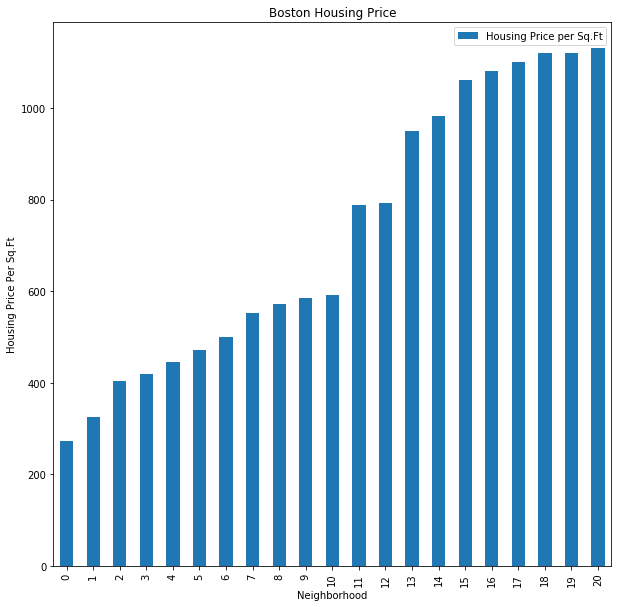

In [317]:
Boston_merged.plot(kind='bar', figsize=(10, 10))
plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Housing Price Per Sq.Ft') # add y-label to the plot
plt.title('Boston Housing Price') # add title to the plot

plt.show()